## About the Project and Use Case

Imagine a bank named IBM Data Bank. Huge number of customers had to leave the bank due to no timely bank services. The Bank had a hard time solving the internal conflicts, streamlining the banking process and bringing the customers back to the bank. The bank now wants to make sure that everything runs smoothly and work on how to retain the customers. For this purpose, they want us to build an Data Science application that would predict which of the customers are more likely to leave the bank soon, so the bank can work on how to retain those customers. In this below applications, I am using various machine learning algorithms and helping the bank in predicting which of the customers are more likely to leave the bank soon.

Note: I am new to deep learning so starting with a small project hope the graders understand and grade me accordingly.

## About the Dataset

The IBM Data Bank is investigating a very high rate of customer leaving the bank. The Dataset contains 10,000 records to investigate and predict which of the customers are more likely to leave the bank soon.

Note: All the data in the dataset is made up data and the dataset is just a subset of the original dataset (for privacy purposes) and also my neural network is scaled down so that I can run on IBM Watson Studio (less CuH available and do not wish to pay so hope the graders understand).

## Initial Exploratory Analysis

In this notebook, the initial exploratory analysis is performed like the identification of quality issues (missing values, wrong measurements etc.), Correlation matrix is generated and in addition we get an idea of the value distribution of the dataset using statistical measures and data visualizations

## Initial Questions Regarding the Dataset for Exploratory Analysis

1. Does the dataset have null values?
2. What is the percentage of customers who left the bank vs who did not leave the bank?
3. Does the dataset contain features have do not impact the final outcome (customer who leave the bank)?
4. How is the correlation between the features and the target?
5. Do customer having higher bank product subscription leave the bank over the customer issues faced?
6. Do customer having credit card leave the bank or not?
7. What type of customer leave the bank - experienced (above 40 years) or young people?
8. Does Credit Score impact the customer decision to leave the company or not?
9. Are there any outliers in the dataset that significantly impact our decision at the end?
10. What is the split up of the customers when compared against "Geography", "NumOfCard", "hasCrCard" and "IsActiveMembers"?

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time
bins=range(0,100,10)
import os
import seaborn as sns
sns.set(style='darkgrid', palette='deep')
%matplotlib inline

In [2]:
# Importing the dataset
data = pd.read_csv('C:/Users/yash.j.shah.TECHASPECT/Downloads/Churn_Modelling.csv')

Let us see the dataset and the column datatypes

In [3]:
# Checking the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Displaying the first  rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We drop the columns namely "RowNumber", "Surname" and "CustomerID" because "RowNumber" is just a series identifier and "Surname" & "CustomerID" doesn't really have any imparct on on the customer decision to leave the bank. We display a statistical summary next to get a gist of the effect of the different statistical measures on the dataset.

In [5]:
# Displaying the statistical summary of the dataset
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Displaying the count of the unique values
exited = data['Exited'].value_counts()
exited

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
# Displaying the percentage of Bank customer not exited vs exited
countNotExited = len(data[data['Exited'] == 0])     
countExited  = len(data[data['Exited'] == 1]) 
print('Percentage not Exited: {:.2f}%'.format((countNotExited/len(data)) * 100)) 
print('Percentage Exited: {:.2f}%'.format((countExited/len(data)) * 100))

Percentage not Exited: 79.63%
Percentage Exited: 20.37%


In [8]:
# Displaying the mean of the columns for the exited states 0 or 1
data.groupby(data['Exited']).mean().head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


## Data Pre-Processing

The data preprocessing section has a sequential flow as below:
1. Check for null or missing values
2. Feature Dropping Test using Correlation Matrix
3. One-hot Encoding

## 1. Check for null or missing values

In [9]:
# Check for the presence of null values in the columns
data.isnull().any()
# Check for the presence of null values in the columns by summing up 
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As we can see that there are no missing values, so we can move forward the feature dropping test using correlation matrix

## 2. Feature Dropping Test using Correlation Matrix

Features with high correlation ratio are more linearly dependent and hence have almost the same effect on the dependent variable, y. 
Note: When two features have high correlation, we can drop one of the two features in question. Please find below the correlation matrix and I don't seem to find any high correlation.

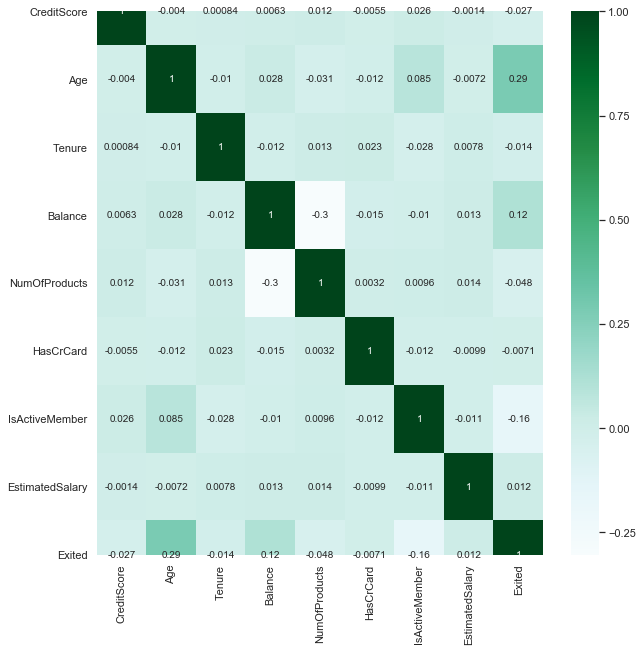

In [10]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='BuGn', annot=True)

## Drawing Conclusion from Correlation Matrix

No two features have high correlation between them

## Data Visualizations

Let us visualize the dataset by generating some visualization and discuss it as generate it

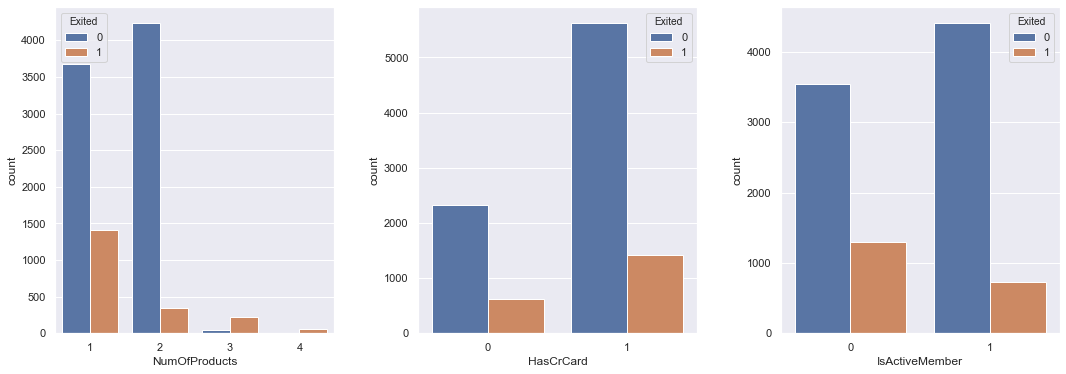

In [11]:
_, ax = plt.subplots(1,3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = data, ax = ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = data, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = data, ax = ax[2])

We generated three plots by comparing the "NumOfProducts", "HasCrCard" and "IsActiveMember" features against the exited feature column and can draw the following conclusions:

1. Customers with 3 or more products have higher chances to churn or leave the bank due to no proper response to them from the bank
2. Customer using the bank credit card also have a higher chance of leave the bank over customer issues

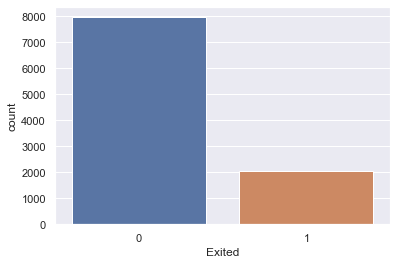

In [12]:
sns.countplot(data.Exited)

The above graph simply display the count of the customer who left the bank and who did not.

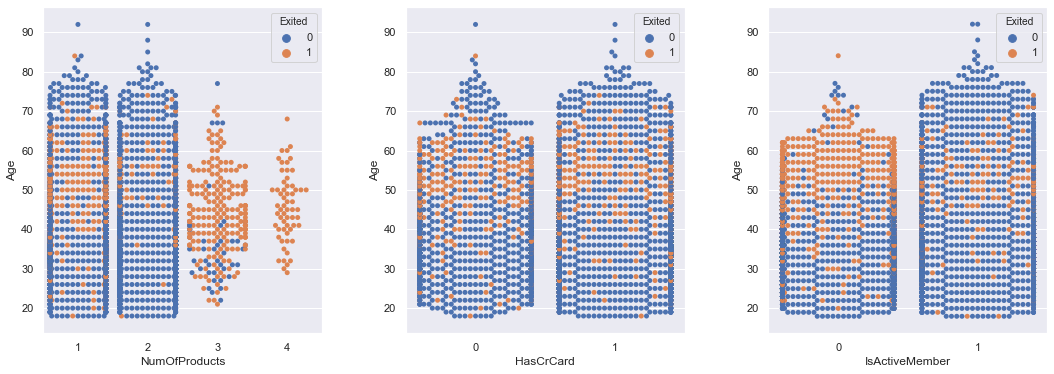

In [13]:
_, ax = plt.subplots(1,3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = data, ax = ax[0])
sns.swarmplot(x = "HasCrCard",  y = "Age", hue="Exited", data = data, ax = ax[1])
sns.swarmplot(x = "IsActiveMember",  y = "Age", hue="Exited", data = data, ax = ax[2])

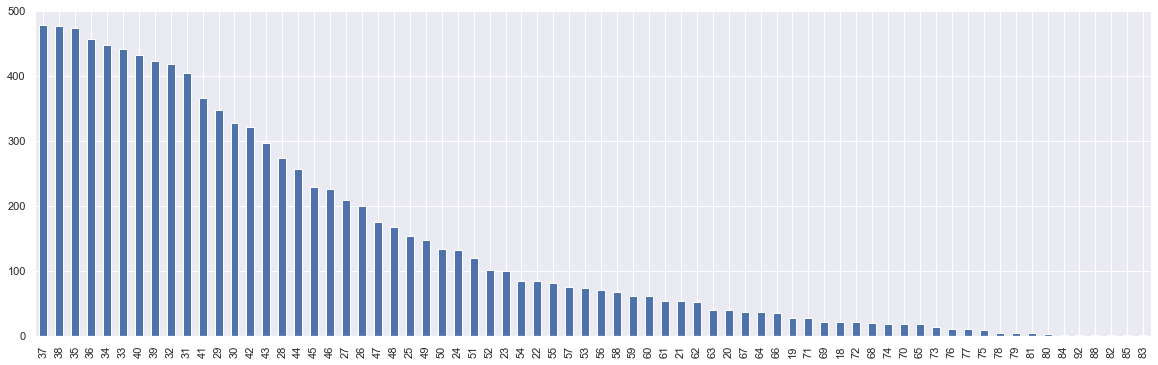

In [14]:
data['Age'].value_counts().plot.bar(figsize=(20,6))

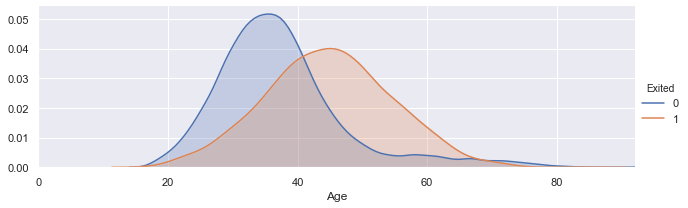

In [15]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data["Age"].max()))
facet.add_legend()

plt.show()

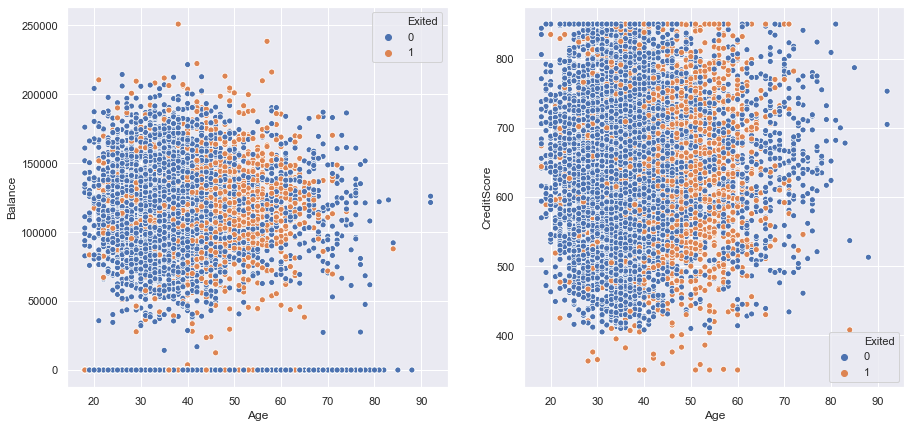

In [16]:
# Age vs Balance
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data, ax=ax[1])

We generated two scatter plots by comparing the "Balance" and "CreditScore" features against the exited feature column and can draw the following conclusions:

1. Customers with age between 40 to 70 years have higher chances to leave the bank
2. Customer with poor Credit Score rating of less than 400 or less tend to have higher chances to leave the bank

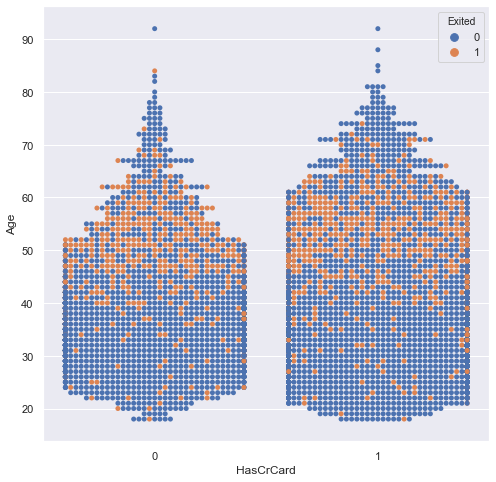

In [17]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "HasCrCard", y = "Age", data = data, hue="Exited")

In the above plot we look at the split of people in terms of age having credit card and who left the bank vs did not leave.

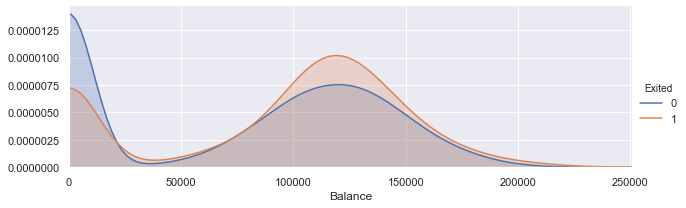

In [18]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, data["Balance"].max()))
facet.add_legend()

plt.show()

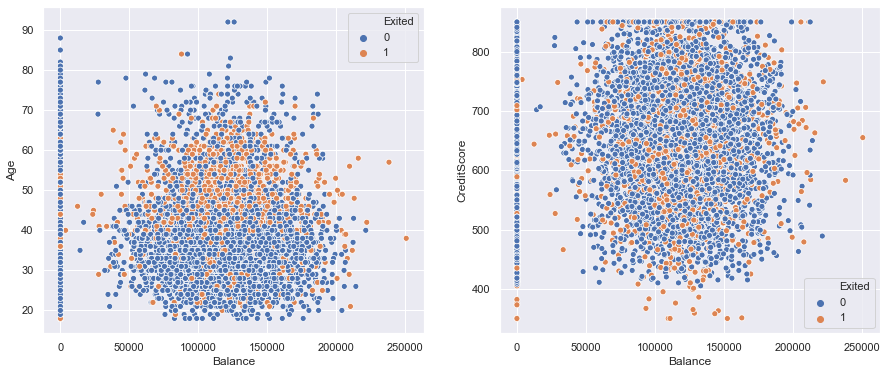

In [19]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = data, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = data, hue="Exited", ax = ax[1])

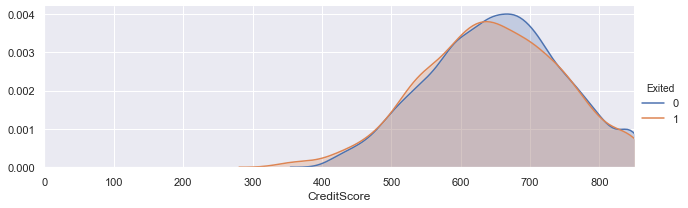

In [20]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, data["CreditScore"].max()))
facet.add_legend()

plt.show()

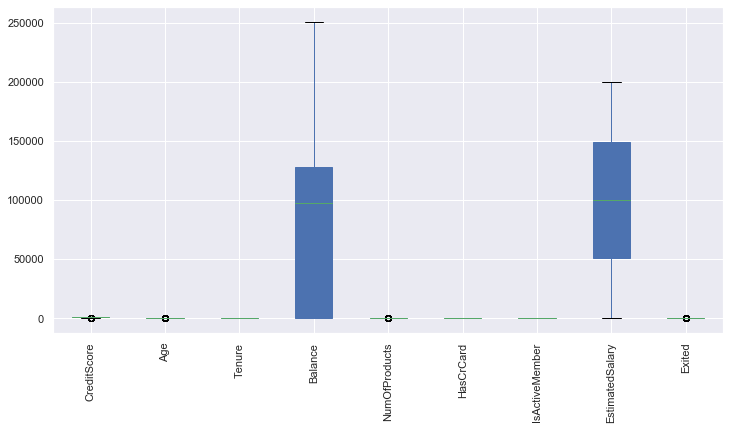

In [21]:
# Detecting Outliers using Boxplots
plt.figure(figsize=(12,6))
bplot = data.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

No real outlier in the dataset that can significantly impact our final results

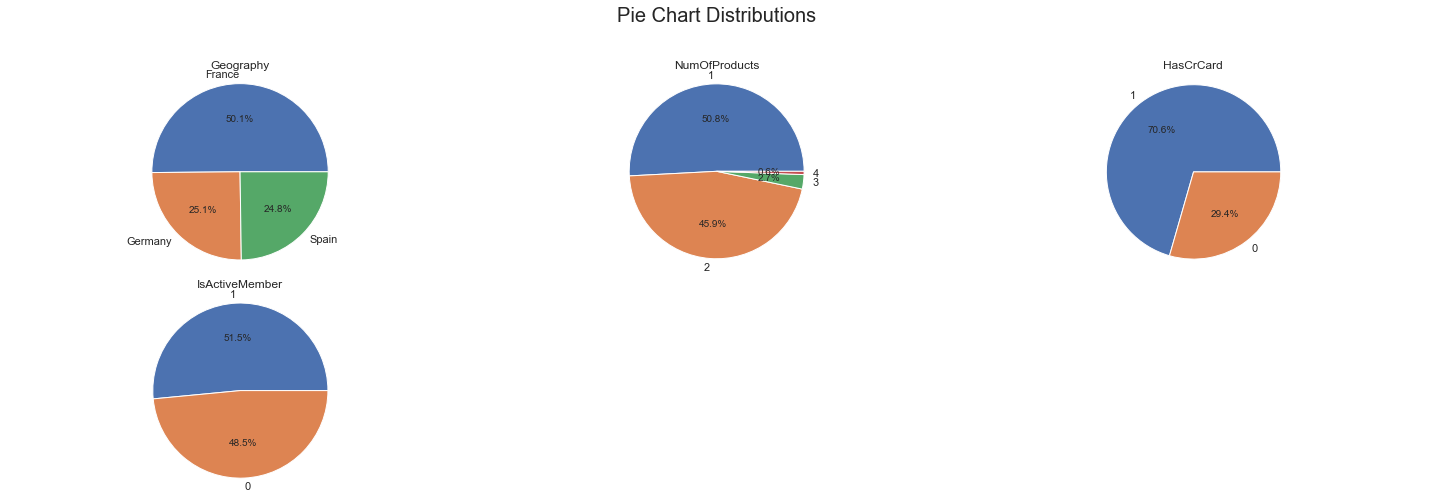

In [22]:
## Pie Plots Distribution Charts 
data.columns
data2 = data.drop( ['Gender', 
                   'CreditScore', 'Age','Tenure', 'Balance',
                   'EstimatedSalary', 'Exited'], axis=1)
fig = plt.figure(figsize=(20, 20))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, data2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data2.columns.values[i - 1])
   
    values = data2.iloc[:, i - 1].value_counts(normalize = True).values
    index = data2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Split up of the customers with respect to features like "Geography", "NumOfProducts", "HasCrCard" and "IsActiveMember"

## Feature Engineering

We will perform feature engineering by performing one-hot encoding for "Geogrpahy" and "Gender" features of the dataset

## NOTE

Before we proceed further with model building steps, it is recommended to split the dataset into train, and test dataset and then apply further pre-processing steps like feature engineering on each dataset separately. 

My reasoning behind doing this is we may need to normalize or standardize the data in our dataset so let assume if we standardize the complete dataset and then split it, the test dataset might have the mean and standard deviation of the training set as well which in turn will not give us accurate conclusions and our test data already has a sense or knowledge of the training data and our model will start to overfit. So avoid this we split the dataset into train and test data and then go forward.

In [23]:
# Splitting the dataset into train, validation and test
from sklearn.model_selection import train_test_split
y = data.Exited
X = data.drop(['Exited'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

So above, we divided the dataset into train and test data. Based on the results we get, we can further tune the model and run it against the test dataset in turn resulting in a good model which can worked on later to optimize it further.

Let us find out the Binary, Numerical and Categorical columns in train and test data and then divide each datasets into further small datasets to perform better preprocessing.

In [24]:
# Dividing the train data into categorical, numerical and binary

binary_columns=["HasCrCard","IsActiveMember"]
binary_data=pd.DataFrame(X_train[binary_columns])

numerical_columns =["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
numerical_data=pd.DataFrame(X_train[numerical_columns])

category_columns=['Geography','Gender']
category_data=pd.DataFrame(X_train[category_columns])

## Lookout for Categorical Values

We find out tht the dataset has two categorical values "Geography" and "Gender". We already know that Machine Learning algorithms only deal with numbers so lets convert this into numbers. We will use One-Hot Encoding to do that.

Reason for using One-Hot Encoding: We know that the limitation on label encoding is, after encoding, the values in the dataset might confuse the model as if they are somewhat sequential. In our dataset, we already know that both the columns are of the same category type, so we opt for One-Hot Encoding instead of Label Encoding.

In [25]:
#(Train Data) One-hot encoding Categorical Data

category_data['Geography'] = category_data['Geography'].astype('category')
category_data['Gender'] = category_data['Gender'].astype('category')
category_data_Final = pd.get_dummies(category_data)

## Feature Scaling

On noticing it close, we can see that we have few columns in out dataset that are at a different range when compared to other features. For this reason, we need to make every column under a common umbrella. There are two techniques for doing it - Normalization and Standardization.

1. Normalization - Data Normalization is the process of rescaling one or more attributes to the range of 0 or 1 (i.e.) the largest values for each attribute is 1 and the smallest values is 0.

2. Standardization - Data Standardization is the process of rescaling one more attributes so that they have a mean values of 0 and a standard deviation of 1.

Note: Generally Standardization is preferred and we will stick to standardization for our data. However, we are not standardizing each column in our dataset. At this point of our preprocessing, we have categorical, binary and numerical. We standardize only numerci valu and ignore the binary values (one-hot encoding produces the binary columns).

In [26]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data_train_mean=numerical_data.mean()
numerical_data_train_std=numerical_data.std(axis=0)
numerical_data_scale =pd.DataFrame(scaler.fit_transform(numerical_data),columns=numerical_columns)

In [27]:
# Concatenate Columns (Train Data)
X_train = pd.concat([numerical_data_scale, category_data_Final,binary_data], axis=1)

## Note

Feature scaling is done on training, testing data seperately to avoid the problem of data leak. So as you can see, we first calculate the mean and standard deviation of each column of the train data and use the standardization formula on every column of testing data.

Repeat the above the steps for testing data

In [28]:
# dividing data into binary, number and categorical (Test data)
binary_columns=["HasCrCard","IsActiveMember"]
binary_data=pd.DataFrame(X_test[binary_columns])

numerical_columns =["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
numerical_data=pd.DataFrame(X_test[numerical_columns])

category_columns=['Geography','Gender']
category_data=pd.DataFrame(X_test[category_columns])

# [TEST] Encode Categorical data (Test data)
category_data['Geography'] = category_data['Geography'].astype('category')
category_data['Gender'] = category_data['Gender'].astype('category')
category_data_Final = pd.get_dummies(category_data)

# [TEST] feature scaling (Test data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data["CreditScore"]=(numerical_data["CreditScore"]-numerical_data_train_mean["CreditScore"]).div(numerical_data_train_std["CreditScore"])
numerical_data["Age"]=(numerical_data["Age"]-numerical_data_train_mean["Age"]).div(numerical_data_train_std["Age"])
numerical_data["Tenure"]=(numerical_data["Tenure"]-numerical_data_train_mean["Tenure"]).div(numerical_data_train_std["Tenure"])
numerical_data["Balance"]=(numerical_data["Balance"]-numerical_data_train_mean["Balance"]).div(numerical_data_train_std["Balance"])
numerical_data["NumOfProducts"]=(numerical_data["NumOfProducts"]-numerical_data_train_mean["NumOfProducts"]).div(numerical_data_train_std["NumOfProducts"])
numerical_data["EstimatedSalary"]=(numerical_data["EstimatedSalary"]-numerical_data_train_mean["EstimatedSalary"]).div(numerical_data_train_std["EstimatedSalary"])

# [TEST] Concatenate Columns (Test data)
X_test = pd.concat([numerical_data, category_data_Final,binary_data], axis=1)

## Safety Precaution

This is optional

In [29]:
# assigning NULL to unused variables
data=None
X=None
y=None
binary_columns=None
binary_data=None
category_data=None
category_columns=None
category_data_Final=None
numerical_data=None
numerical_columns=None
numerical_data_train_mean=None
scaler=None
numerical_data_train_std=None
numerical_data_scale=None
null_columns=None

## Modeling Defintion, Training and Evaluation

We will build two models, one using a traditional machine learning algorithm (Logistic Regression, Random Forest) and one with Neural Network Algorithm. 

Let see how does the Logistic Regression Performs.

I have used Logistic Regression as my traditional machine learning algorithm because it uses a logarithmic trnasformation on the target variable which allows us to model a non-linear association in a linear way 

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accu_score = accuracy_score(y_pred, y_test)
accu_score

0.807

Let see how the neural network performs Now.


The Neural Network consist of the following:
    
1. Input Layer
2. 3 Hidden Layer - Neurons: 6, 12, 24 
3. Output Layer
4. Learning rate: 0.02
5. Metrics: Accuracy, MAE

1. I have chosen Keras Framework as it is built on top on tensorflow. So if you want quickly build and test a neural network with minimal lines of code, I would choose Keras. With Keras Framework, I can quickly build simple or very complex neural network within few minutes, The Sequential() is powerful you can do almost everything you may want.
<br><br>
2. I have chosen ANN network model because it is easy to use and understand compared to statistical methods. ANN is non-parametric model and use Back propagation learning algorithm and it is widely used for classification problems

In [31]:
#defining and compiling model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

def deep_model():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='he_uniform',
                bias_initializer='ones', activation='relu', input_dim=13))
    classifier.add(Dense(units=12, kernel_initializer='he_uniform',
                bias_initializer='ones', activation='relu'))
    classifier.add(Dense(units=24, kernel_initializer='he_uniform',
                bias_initializer='ones', activation='relu'))
    classifier.add(Dense(units=12, kernel_initializer='he_uniform',
                bias_initializer='ones', activation='relu'))
    classifier.add(Dense(units=1,  kernel_initializer='he_uniform',
                bias_initializer='ones', activation='sigmoid'))
    classifier.compile(optimizer=Adam(learning_rate=0.002, amsgrad=False),
                        loss='binary_crossentropy', 
                        metrics=['accuracy','mae'])
    return classifier

Using TensorFlow backend.


Training the model with batch size of 80 over 1500 epochs

In [32]:
# fitting the data 
from keras.models import load_model
classifier = deep_model()
output=classifier.fit(X_train, y_train, batch_size=80,epochs=1500,verbose=1,shuffle=False)

Epoch 1/1500
8000/8000 [==============================] - 0s 31us/step - loss: 0.4596 - accuracy: 0.8009 - mae: 0.2813
Epoch 2/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.4246 - accuracy: 0.8140 - mae: 0.2669
Epoch 3/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.4134 - accuracy: 0.8219 - mae: 0.2613
Epoch 4/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.3999 - accuracy: 0.8311 - mae: 0.2532
Epoch 5/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3792 - accuracy: 0.8396 - mae: 0.2407
Epoch 6/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3599 - accuracy: 0.8489 - mae: 0.2263
Epoch 7/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3505 - accuracy: 0.8551 - mae: 0.2182
Epoch 8/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.3461 - accuracy: 0.8584 - mae: 0.2138
Epoch 9/1500
8000/8000 [========================

8000/8000 [==============================] - 0s 12us/step - loss: 0.3157 - accuracy: 0.8689 - mae: 0.1917
Epoch 138/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3159 - accuracy: 0.8687 - mae: 0.1917
Epoch 139/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3155 - accuracy: 0.8683 - mae: 0.1916
Epoch 140/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3152 - accuracy: 0.8684 - mae: 0.1915
Epoch 141/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3153 - accuracy: 0.8686 - mae: 0.1914
Epoch 142/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.3153 - accuracy: 0.8677 - mae: 0.1914
Epoch 143/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3154 - accuracy: 0.8684 - mae: 0.1914
Epoch 144/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3155 - accuracy: 0.8683 - mae: 0.1915
Epoch 145/1500
8000/8000 [=====================

Epoch 271/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3086 - accuracy: 0.8696 - mae: 0.1872
Epoch 272/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3082 - accuracy: 0.8709 - mae: 0.1872
Epoch 273/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3083 - accuracy: 0.8696 - mae: 0.1872
Epoch 274/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3083 - accuracy: 0.8702 - mae: 0.1871
Epoch 275/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3079 - accuracy: 0.8704 - mae: 0.1870
Epoch 276/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3079 - accuracy: 0.8714 - mae: 0.1869
Epoch 277/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3079 - accuracy: 0.8705 - mae: 0.1869
Epoch 278/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3079 - accuracy: 0.8711 - mae: 0.1869
Epoch 279/1500
8000/8000 [======

8000/8000 [==============================] - 0s 12us/step - loss: 0.3037 - accuracy: 0.8736 - mae: 0.1845
Epoch 406/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3035 - accuracy: 0.8748 - mae: 0.1842
Epoch 407/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3037 - accuracy: 0.8746 - mae: 0.1843
Epoch 408/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3032 - accuracy: 0.8758 - mae: 0.1846
Epoch 409/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3027 - accuracy: 0.8735 - mae: 0.1838
Epoch 410/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3040 - accuracy: 0.8737 - mae: 0.1843
Epoch 411/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3033 - accuracy: 0.8741 - mae: 0.1843
Epoch 412/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3033 - accuracy: 0.8761 - mae: 0.1840
Epoch 413/1500
8000/8000 [=====================

8000/8000 [==============================] - 0s 12us/step - loss: 0.2998 - accuracy: 0.8771 - mae: 0.1823
Epoch 539/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3018 - accuracy: 0.8749 - mae: 0.1828
Epoch 540/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3008 - accuracy: 0.8758 - mae: 0.1825
Epoch 541/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3011 - accuracy: 0.8761 - mae: 0.1825
Epoch 542/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3004 - accuracy: 0.8754 - mae: 0.1824
Epoch 543/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3003 - accuracy: 0.8763 - mae: 0.1824
Epoch 544/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2998 - accuracy: 0.8761 - mae: 0.1823
Epoch 545/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.3001 - accuracy: 0.8760 - mae: 0.1822
Epoch 546/1500
8000/8000 [=====================

8000/8000 [==============================] - 0s 14us/step - loss: 0.2965 - accuracy: 0.8765 - mae: 0.1798
Epoch 673/1500
8000/8000 [==============================] - 0s 14us/step - loss: 0.2965 - accuracy: 0.8756 - mae: 0.1801
Epoch 674/1500
8000/8000 [==============================] - 0s 14us/step - loss: 0.2970 - accuracy: 0.8759 - mae: 0.1806
Epoch 675/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2964 - accuracy: 0.8771 - mae: 0.1804
Epoch 676/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2963 - accuracy: 0.8752 - mae: 0.1800
Epoch 677/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2955 - accuracy: 0.8758 - mae: 0.1798
Epoch 678/1500
8000/8000 [==============================] - 0s 14us/step - loss: 0.2971 - accuracy: 0.8749 - mae: 0.1798
Epoch 679/1500
8000/8000 [==============================] - 0s 14us/step - loss: 0.2966 - accuracy: 0.8760 - mae: 0.1803
Epoch 680/1500
8000/8000 [=====================

Epoch 805/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2925 - accuracy: 0.8760 - mae: 0.1778
Epoch 806/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2923 - accuracy: 0.8781 - mae: 0.1779
Epoch 807/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2935 - accuracy: 0.8760 - mae: 0.1782
Epoch 808/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2933 - accuracy: 0.8770 - mae: 0.1779
Epoch 809/1500
8000/8000 [==============================] - ETA: 0s - loss: 0.2955 - accuracy: 0.8757 - mae: 0.17 - 0s 11us/step - loss: 0.2925 - accuracy: 0.8769 - mae: 0.1779
Epoch 810/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2921 - accuracy: 0.8774 - mae: 0.1779
Epoch 811/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2919 - accuracy: 0.8754 - mae: 0.1775
Epoch 812/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2927 - accurac

8000/8000 [==============================] - 0s 11us/step - loss: 0.2899 - accuracy: 0.8789 - mae: 0.1760
Epoch 937/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2907 - accuracy: 0.8773 - mae: 0.1768
Epoch 938/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2907 - accuracy: 0.8776 - mae: 0.1765 0s - loss: 0.2893 - accuracy: 0.8773 - mae: 0.17
Epoch 939/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2901 - accuracy: 0.8777 - mae: 0.1769
Epoch 940/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2893 - accuracy: 0.8780 - mae: 0.1761
Epoch 941/1500
8000/8000 [==============================] - ETA: 0s - loss: 0.2915 - accuracy: 0.8775 - mae: 0.17 - 0s 12us/step - loss: 0.2903 - accuracy: 0.8783 - mae: 0.1763
Epoch 942/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2898 - accuracy: 0.8780 - mae: 0.1763
Epoch 943/1500
8000/8000 [==============================] - 0s 

8000/8000 [==============================] - 0s 12us/step - loss: 0.2880 - accuracy: 0.8789 - mae: 0.1752
Epoch 1066/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2879 - accuracy: 0.8808 - mae: 0.1750
Epoch 1067/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2876 - accuracy: 0.8790 - mae: 0.1750
Epoch 1068/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2869 - accuracy: 0.8811 - mae: 0.1747
Epoch 1069/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2874 - accuracy: 0.8796 - mae: 0.1748
Epoch 1070/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2868 - accuracy: 0.8791 - mae: 0.1748
Epoch 1071/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2867 - accuracy: 0.8799 - mae: 0.1746
Epoch 1072/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2870 - accuracy: 0.8784 - mae: 0.1750
Epoch 1073/1500
8000/8000 [=============

8000/8000 [==============================] - 0s 12us/step - loss: 0.2843 - accuracy: 0.8814 - mae: 0.1732
Epoch 1131/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2859 - accuracy: 0.8815 - mae: 0.1736
Epoch 1132/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2853 - accuracy: 0.8805 - mae: 0.1736
Epoch 1133/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.2840 - accuracy: 0.8820 - mae: 0.1730
Epoch 1134/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2832 - accuracy: 0.8810 - mae: 0.1727
Epoch 1135/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2877 - accuracy: 0.8775 - mae: 0.1744
Epoch 1136/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2861 - accuracy: 0.8788 - mae: 0.1739
Epoch 1137/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2850 - accuracy: 0.8799 - mae: 0.1733
Epoch 1138/1500
8000/8000 [=============

8000/8000 [==============================] - 0s 12us/step - loss: 0.2816 - accuracy: 0.8829 - mae: 0.1715
Epoch 1257/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2802 - accuracy: 0.8838 - mae: 0.1708
Epoch 1258/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2812 - accuracy: 0.8844 - mae: 0.1714
Epoch 1259/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.2815 - accuracy: 0.8846 - mae: 0.1713
Epoch 1260/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2816 - accuracy: 0.8832 - mae: 0.1718 0s - loss: 0.2862 - accuracy: 0.8809 - mae: 0.17
Epoch 1261/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.2809 - accuracy: 0.8842 - mae: 0.1709
Epoch 1262/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2810 - accuracy: 0.8845 - mae: 0.1711
Epoch 1263/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2819 - accuracy: 0.8844 - mae

Epoch 1387/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.2814 - accuracy: 0.8821 - mae: 0.1711
Epoch 1388/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2805 - accuracy: 0.8835 - mae: 0.1706
Epoch 1389/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2798 - accuracy: 0.8849 - mae: 0.1702
Epoch 1390/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2803 - accuracy: 0.8851 - mae: 0.1706
Epoch 1391/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2802 - accuracy: 0.8857 - mae: 0.1703
Epoch 1392/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2829 - accuracy: 0.8835 - mae: 0.1713
Epoch 1393/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2801 - accuracy: 0.8859 - mae: 0.1701
Epoch 1394/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.2795 - accuracy: 0.8864 - mae: 0.1705
Epoch 1395/1500
8000/800

## Evaluation Metrics:

1. Accuracy Score
2. Confusion Matrix

<b>Justification:</b> I use the evaluation metrics like accuracy and confusion matrix because since my scenerio is a binary classification Confusion matrix is a good evaluation matric because it gives you the true positives, true negative, false negatives and false positives. I used Accuracy score to know how accurate was my model in predicting the original outcome.

In [34]:
#calculating Evaluation Metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

# Confusion Matrix
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
results = pd.DataFrame([['ANN Network', accuracy]],
                      columns = ['Model', 'Accuracy'])
print(results)


         Model  Accuracy
0  ANN Network    0.8515


## Visualization of Evaluation Metrics

dict_keys(['loss', 'accuracy', 'mae'])


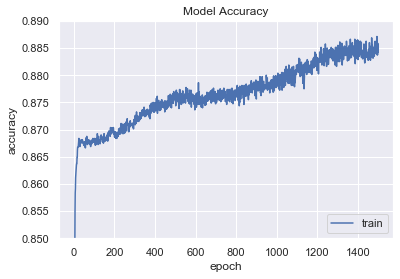

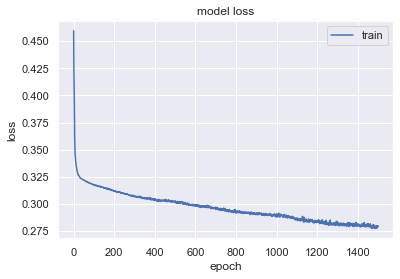

In [35]:
# Summarizing output for accuracy
print(output.history.keys())
plt.plot(output.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.ylim(0.85,0.89)
plt.show()
#Summarizing output for loss
plt.plot(output.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()